## Probability Function for single and multiple eigenstate cases :
The probability of measuring a certain $|y\rangle$ is given by <br>
<br>
$$\therefore \operatorname{Pr}(y) = \frac{1}{M^2}\left(\frac{1-\cos{\left(\frac{2 \pi M}{M}\left(y- \frac{\theta M}{2\pi}\right)\right)}}{1-\cos{\left(\frac{2 \pi }{M}\left(y- \frac{\theta M}{2\pi}\right)\right)}}\right) \hspace{0.5cm} where, \hspace{0.2cm} M = 2^t
$$
<br>
Now for general case where $|\psi_k\rangle = \sum_{k}a_k|\psi_k\rangle$ is a superposition of a number of states the probability of measuring a certain $|y\rangle$ is given by <br>
<br>
$$
Pr(y_0) = \frac{1}{M^2}\sum_{k}a_k^2 \left(\frac{1-\cos{\left(\frac{2 \pi M}{M}\left(y_0- \frac{\theta_k M}{2\pi}\right)\right)}}{1-\cos{\left(\frac{2 \pi }{M}\left(y_0- \frac{\theta_k M}{2\pi}\right)\right)}}\right) \hspace{0.5cm} where, \hspace{0.2cm} M = 2^t
$$ 
<br>

In [39]:
# t = estimation register size ; y = 0 to 2^t-1 ; 0 < Theta < 2*pi
import matplotlib.pyplot as plt

def P(t, theta, y):       # P(y,theta) for basic case (one eigenstate)
    import numpy as np
    M=2**t
    numerator = 1 - np.cos((2*np.pi)*(y - theta*M/(2*np.pi)))
    denominator = 1 - np.cos((2*np.pi/M)*(y - theta*M/(2*np.pi)))
    return numerator/(denominator*M**2)


def Pr(t, y, a_k, theta):         # P(y,theta) for general case (multiple eigenstate) returns total sum +  
    list=[]                       # contribution from each terms
    import numpy as np
    M=2**t
    
    for k in range(len(a_k)):
        numerator = 1 - np.cos((2*np.pi)*(y - theta[k]*M/(2*np.pi)))
        denominator = 1 - np.cos((2*np.pi/M)*(y - theta[k]*M/(2*np.pi)))
        term = (a_k[k]**2)*(numerator/denominator)
        list.append(term/M**2)
            
    return sum(list), list 


<ipython-input-39-b1486d183e0f>:9: RuntimeWarning: invalid value encountered in double_scalars
  return numerator/(denominator*M**2)


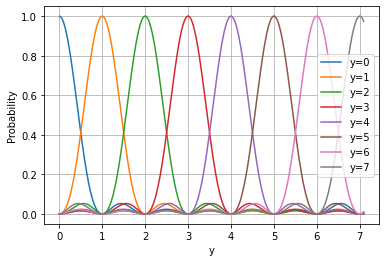

In [40]:
#plotting for basic case (single eigenstate)

import numpy as np
t=3
theta = np.arange(0, 2*np.pi, np.pi/4)
y=np.arange(0,7.1,0.01) 

for j in range(len(theta)):
    x=[]
    for i in range(len(y)):
        x.append(P(t, theta[j], y[i]))
    plt.plot(y, x, label= 'y={0}'.format(j))
    
plt.grid()
plt.xlabel("y")
plt.ylabel("Probability")
plt.legend()
plt.show()


In [41]:
print(P(3, 1.5, 2)) #for basic case

0.9739596198382319


In [42]:
# Using the expression of general case (Checking if it matches with above if there is only one eigen state)

t=3
y=2
a_k =[1] 
theta = [1.5]
print(Pr(t, y, a_k, theta))

(0.9739596198382319, [0.9739596198382319])


<ipython-input-39-b1486d183e0f>:20: RuntimeWarning: invalid value encountered in double_scalars
  term = (a_k[k]**2)*(numerator/denominator)


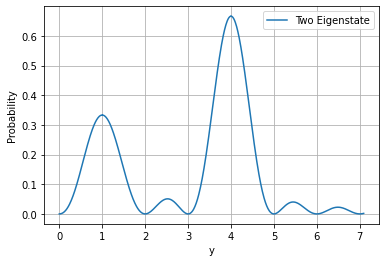

In [43]:
import numpy as np
t=3
a_k = [1/np.sqrt(3), np.sqrt(2/3)]
x=np.arange(0,7.1,0.01)

#create two empty lists to contain values of each term in the sum

y=[]

for j in range(len(x)):
    y.append(Pr(t, x[j], a_k, [np.pi/4 , np.pi])[0])
    
plt.plot(x,y, label="Two Eigenstate")
    
plt.grid()
plt.xlabel("y")
plt.ylabel("Probability")
plt.legend()
plt.show()

## Density Matrix :
The density matrix is defined as $\rho = \sum_{i}p_i|\psi_i\rangle\langle\psi_i|$  where $\psi_i$'s are the quantum states with different probability amplitude $p_i$. However in our case there is only one state $|\phi_3\rangle$, so the density matrix is given by $\rho = |\phi_3\rangle\langle\phi_3|$. <br>  

$$\therefore \rho = |\phi_3\rangle\langle\phi_3|$$
<br> 
$$
\left( \frac{1}{M} \sum_{j=0}^{M-1} \left(\sum_{x=0}^{M-1} e^{-2 \pi i\frac{jx}{M}}|x\rangle \right)\otimes\sum_{k}a_ke^{2\pi ij\frac{\theta_k}{2\pi}}|\psi_k\rangle\right)\left(\frac{1}{M} \sum_{j^{\prime}=0}^{M-1} \left(\sum_{y=0}^{M-1} e^{2 \pi i\frac{j^{\prime}y}{M}}\langle y| \right)\otimes\sum_{k^{\prime}}a_{k^{\prime}}e^{-2\pi ij^{\prime}\frac{\theta_{k^{\prime}}}{2\pi}}\langle\psi_{k^{\prime}}| \right)
$$
<br> 

$$
=\frac{1}{M^2} \sum_{k}\sum_{k^{\prime}}a_ka_{k^{\prime}}\sum_{x=0}^{M-1}\sum_{j=0}^{M-1} e^{-2 \pi ij \left(\frac{x}{M}-\frac{\theta_k}{2\pi} \right)}\sum_{y=0}^{M-1}\sum_{j^{\prime}=0}^{M-1} e^{2 \pi ij^{\prime} \left(\frac{y}{M}-\frac{\theta_{k^{\prime}}}{2\pi}\right)}|x\rangle\langle y|\otimes|\psi_k\rangle \langle\psi_{k^{\prime}}|
$$
<br> 

$$
=\frac{1}{M^2} \sum_{k}\sum_{k^{\prime}}a_ka_{k^{\prime}}\left[\sum_{x=0}^{M-1}\frac{e^{-2 \pi i \left(\frac{x}{M}-\frac{\theta_k}{2\pi} \right)M}-1}{e^{-2 \pi i \left(\frac{x}{M}-\frac{\theta_k}{2\pi} \right)}-1}\right]\left[\sum_{y=0}^{M-1}\frac{e^{2 \pi i \left(\frac{y}{M}-\frac{\theta_{k^{\prime}}}{2\pi}\right)M}-1}{e^{2 \pi i \left(\frac{y}{M}-\frac{\theta_{k^{\prime}}}{2\pi}\right)}-1}\right]|x\rangle\langle y|\otimes|\psi_k\rangle \langle\psi_{k^{\prime}}|
$$
<br> 

### Incomplete density matrix function
Here is version of incomplete density matrix function :
$$
\rho = \sum_{y=0}^{M-1}\frac{1}{M^2}\sum_{k}a_k^2 \left(\frac{1-\cos{\left(\frac{2 \pi M}{M}\left(y_0- \frac{\theta_k M}{2\pi}\right)\right)}}{1-\cos{\left(\frac{2 \pi }{M}\left(y_0- \frac{\theta_k M}{2\pi}\right)\right)}}\right)|y\rangle\langle y| \hspace{0.5cm} where, \hspace{0.2cm} M = 2^t
$$ 
<br>
### Steps for writing the function
<br>
<list>
<li>Change $|y\rangle$ and $\langle y|$ to computational basis form depending on the number of t qubits. For example $\langle5|$ for t=3 qubits should be $\langle 101| = $ [0,0,0,0,1,0,0,0]
<li> Write codes that transforms y to binary list form. Add extra zero to the biginning of list if list size is less than t.
<li> Write some codes that are able to perform proper tensor product. For example $\langle 101| =(0,1)\otimes(1,0)\otimes(0,1) =  [0,0,0,0,1,0,0,0]$. 
<li> Do the same for ket part (Do same as before but at last make a transpose of the matrix)
<li> Calculate the outer product $|y\rangle\langle y|$ multiplied by probability function.
<li> Calculate $\sum_{y}P(y)|y\rangle \langle y|$  
<list>

In [44]:
def RHO(t, a_k, theta):
    M=2**t
    # Define a rho which gives back a matrix for a particular x,y () Basically gives back P(y)|y><y|
    
    def rho(x, y, t, a_k, theta):
        
        def Pr(t, y, a_k, theta):         # P(y,theta) for general case (multiple eigenstate) returns total sum +  
            List=[]                       # contribution from each terms
            import numpy as np
               
            for k in range(len(a_k)):
                numerator = 1 - np.cos((2*np.pi)*(y - theta[k]*M/(2*np.pi)))
                denominator = 1 - np.cos((2*np.pi/M)*(y - theta[k]*M/(2*np.pi)))
                term = (a_k[k]**2)*(numerator/denominator)
                List.append(term/M**2)
            
            return sum(List)
    
        def Multiply(A,B):              # A,B are array gives tensor product
            X=list(A[0]*B)              # multiply 0th term of A with all term of B and store it in X
            for i in range(1,len(A)):   
                X = X + list(A[i]*B)    # Loop concatenates/inserts next terms like 1st term of A multiplied by B in same X
            return X
    
        def columnmatrix(x,t):        # Creates |x> ket column term, here x is integer, we create computational basis 
            import numpy as np        # corresponding to that x depending on total size of t estimation register 
            x1=[]                     # example x=2, t=3 gives columnmatrix(x,t) =[0,0,0,0,0,0,1,0]
            Zero = np.array([1,0])    # qubit 0 state
            One = np.array([0,1])     # qubit 1 state
            if x==0:
                x1.append(x)
            while x != 0:
                x1.append(x%2)
                x = x//2 
            while len(x1)!= t:
                x1.append(0)
            
            x1.reverse()              # x1 is list containig binary form of x 
            x2 = np.array(x1)         # Now if we can do tensor product using matrices for 0 and 1 we get basis form of x
            if x2[0] == 0:            # If 0th term is 0 then begin tensor product using Multiply function   
                A = Zero
                for i in range(1,len(x2)):
                    if x2[i] == 0:
                        A = Multiply(A,Zero)
                    elif x2[i] == 1:
                        A = Multiply(A,One)
        
            elif x2[0] == 1:          # If 0th term is 1 then begin tensor product using Multiply function
                A = One
                for i in range(1,len(x2)):
                    if x2[i] == 0:
                        A = Multiply(A,Zero)
                    elif x2[i] == 1:
                        A = Multiply(A,One)
            return np.matrix(A).T     # make transpose of whole matrix (1D array) found using tensor product 
        
        def rowmatrix(y,t):           # Creates <y| bra row term, here y is integer, we create computational basis 
            import numpy as np        # same procepure as above but don't do transpose at last, this will keep row form
            x1=[]
            Zero = np.array([1,0])
            One = np.array([0,1])
            if y==0:
                x1.append(y)
            while y != 0:
                x1.append(y%2)
                y = y//2 
            while len(x1)!= t:
                x1.append(0)
            
            x1.reverse()
            x2 = np.array(x1)
            if x2[0] == 0:
                A = Zero
                for i in range(1,len(x2)):
                    if x2[i] == 0:
                        A = Multiply(A,Zero)
                    elif x2[i] == 1:
                        A = Multiply(A,One)
        
            elif x2[0] == 1:
                A = One
                for i in range(1,len(x2)):
                    if x2[i] == 0:
                        A = Multiply(A,Zero)
                    elif x2[i] == 1:
                        A = Multiply(A,One)
            return np.matrix(A)         # the whole matrix (1D array) found using tensor product 
        
        return columnmatrix(x,t)*rowmatrix(y,t)*round(Pr(t, y, a_k, theta),3) # this is P(y)|x><y| does work for only P(y)|y><y|
    
    Matrix = rho(0, 0, t, a_k, theta)   # this is P(0)|0><0|
    for j in range(1, M):
        Matrix += rho(j, j, t, a_k, theta)
    return Matrix                       # this is Sum(P(y)|y><y|)
    

In [45]:
t=3
import numpy as np
a_k =[1/np.sqrt(3), np.sqrt(2)/np.sqrt(3)]
theta = [round(np.pi/4,3), round(np.pi,3)]

In [46]:
print(RHO(t, a_k, theta))

[[0.    0.    0.    0.    0.    0.    0.    0.   ]
 [0.    0.333 0.    0.    0.    0.    0.    0.   ]
 [0.    0.    0.    0.    0.    0.    0.    0.   ]
 [0.    0.    0.    0.    0.    0.    0.    0.   ]
 [0.    0.    0.    0.    0.667 0.    0.    0.   ]
 [0.    0.    0.    0.    0.    0.    0.    0.   ]
 [0.    0.    0.    0.    0.    0.    0.    0.   ]
 [0.    0.    0.    0.    0.    0.    0.    0.   ]]


### Complete density matrix function
Here is the trial version of complete density matrix function :
<br> 

$$
\rho =\frac{1}{M^2} \sum_{k}\sum_{k^{\prime}}a_ka_{k^{\prime}}\left[\sum_{x=0}^{M-1}\frac{e^{-2 \pi i \left(\frac{x}{M}-\frac{\theta_k}{2\pi} \right)M}-1}{e^{-2 \pi i \left(\frac{x}{M}-\frac{\theta_k}{2\pi} \right)}-1}\right]\left[\sum_{y=0}^{M-1}\frac{e^{2 \pi i \left(\frac{y}{M}-\frac{\theta_{k^{\prime}}}{2\pi}\right)M}-1}{e^{2 \pi i \left(\frac{y}{M}-\frac{\theta_{k^{\prime}}}{2\pi}\right)}-1}\right]|x\rangle\langle y|
$$
<br> 

In [47]:
def RHO_C(t, a_k, theta):
    M=2**t
    # Define a rho which gives back a matrix for a particular x,y () Basically gives back P(y)|y><y|
    
    def rho(x, y, t, a_k, theta):
        
        def Pr(t, y, a_k, theta):         # P(y,theta) for general case (multiple eigenstate) returns total sum +  
            List=[]                       # contribution from each terms
            import numpy as np
               
            for k in range(len(a_k)):
                numerator = 1 - np.cos((2*np.pi)*(y - theta[k]*M/(2*np.pi)))
                denominator = 1 - np.cos((2*np.pi/M)*(y - theta[k]*M/(2*np.pi)))
                term = (a_k[k]**2)*(numerator/denominator)
                List.append(term/M**2)
            return sum(List)
        
        def Gr(t, x, y, a_k, theta):         # P(y,theta) for general case (multiple eigenstate) returns total sum +  
            List=[]                       # contribution from each terms
            import numpy as np
            import cmath   
            z = 0+1j
            for k in range(len(a_k)):
                a = a_k[k]
                term1 = (np.exp(-2*np.pi*z*(x - theta[k]*M/(2*np.pi)))-1)/((np.exp(-2*np.pi*z*(x - theta[k]*M/(2*np.pi)/M))-1))
                for k_prime in range(len(a_k)):
                    term2 = a*a_k[k_prime]*term1*(np.exp(2*np.pi*z*(y - theta[k_prime]*M/(2*np.pi)))-1)/((np.exp(2*np.pi*z*(y - theta[k_prime]*M/(2*np.pi))/M))-1)
                
                    List.append(term2/M**2)
            
            return sum(List)
    
        def Multiply(A,B):              # A,B are array gives tensor product
            X=list(A[0]*B)              # multiply 0th term of A with all term of B and store it in X
            for i in range(1,len(A)):   
                X = X + list(A[i]*B)    # Loop concatenates/inserts next terms like 1st term of A multiplied by B in same X
            return X
    
        def columnmatrix(x,t):        # Creates |x> ket column term, here x is integer, we create computational basis 
            import numpy as np        # corresponding to that x depending on total size of t estimation register 
            x1=[]                     # example x=2, t=3 gives columnmatrix(x,t) =[0,0,0,0,0,0,1,0]
            Zero = np.array([1,0])    # qubit 0 state
            One = np.array([0,1])     # qubit 1 state
            if x==0:
                x1.append(x)
            while x != 0:
                x1.append(x%2)
                x = x//2 
            while len(x1)!= t:
                x1.append(0)
            
            x1.reverse()              # x1 is list containig binary form of x 
            x2 = np.array(x1)         # Now if we can do tensor product using matrices for 0 and 1 we get basis form of x
            if x2[0] == 0:            # If 0th term is 0 then begin tensor product using Multiply function   
                A = Zero
                for i in range(1,len(x2)):
                    if x2[i] == 0:
                        A = Multiply(A,Zero)
                    elif x2[i] == 1:
                        A = Multiply(A,One)
        
            elif x2[0] == 1:          # If 0th term is 1 then begin tensor product using Multiply function
                A = One
                for i in range(1,len(x2)):
                    if x2[i] == 0:
                        A = Multiply(A,Zero)
                    elif x2[i] == 1:
                        A = Multiply(A,One)
            return np.matrix(A).T     # make transpose of whole matrix (1D array) found using tensor product 
        
        def rowmatrix(y,t):           # Creates <y| bra row term, here y is integer, we create computational basis 
            import numpy as np        # same procepure as above but don't do transpose at last, this will keep row form
            x1=[]
            Zero = np.array([1,0])
            One = np.array([0,1])
            if y==0:
                x1.append(y)
            while y != 0:
                x1.append(y%2)
                y = y//2 
            while len(x1)!= t:
                x1.append(0)
            
            x1.reverse()
            x2 = np.array(x1)
            if x2[0] == 0:
                A = Zero
                for i in range(1,len(x2)):
                    if x2[i] == 0:
                        A = Multiply(A,Zero)
                    elif x2[i] == 1:
                        A = Multiply(A,One)
        
            elif x2[0] == 1:
                A = One
                for i in range(1,len(x2)):
                    if x2[i] == 0:
                        A = Multiply(A,Zero)
                    elif x2[i] == 1:
                        A = Multiply(A,One)
            return np.matrix(A)         # the whole matrix (1D array) found using tensor product 
        if x==y:
            return columnmatrix(x,t)*rowmatrix(y,t)*round(Pr(t, y, a_k, theta),3) # this is P(y)|x><y| does work for only P(y)|y><y|
        else:
             return columnmatrix(x,t)*rowmatrix(y,t)*round(abs(Gr(t, x, y, a_k, theta)),3)
            
    Matrix = np.matrix(np.zeros([M,M]))   # Initiate zero matrix
    for j in range(0, M):
        for l in range(0, M):
            Matrix += rho(l, j, t, a_k, theta)
    return Matrix                       # this is Sum(P(x,y)|x><y|)
    

In [48]:
RHO_C(t, a_k, theta)

matrix([[0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ],
        [0.   , 0.333, 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ],
        [0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ],
        [0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ],
        [0.   , 0.   , 0.   , 0.   , 0.667, 0.   , 0.   , 0.   ],
        [0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ],
        [0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ],
        [0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ]])